# Students (Por) Dataset Analysis

In [1]:
import pandas as pd
import numpy as np

## General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

<AxesSubplot:ylabel='G3'>

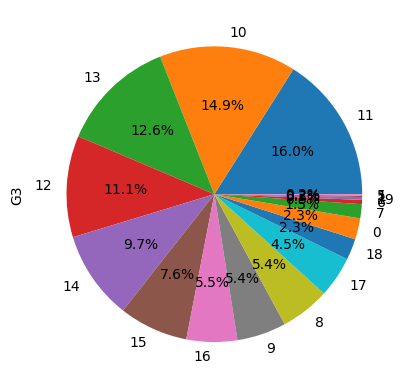

In [2]:
df = pd.read_csv("../Cleaned/Students/student-por.csv", skipinitialspace=True)
df.info()
print("target count")
print(df['G3'].value_counts())
df['G3'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## Sex

F    383
M    266
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

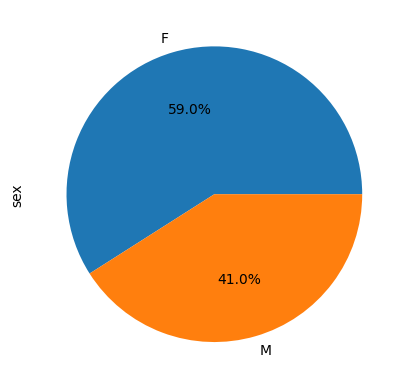

In [3]:
print(df['sex'].value_counts())
df['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = M

11    50
10    45
13    28
12    28
14    22
9     19
15    17
8     15
16    13
17     8
0      8
18     4
7      3
6      3
1      1
5      1
19     1
Name: G3, dtype: int64


<AxesSubplot:ylabel='G3'>

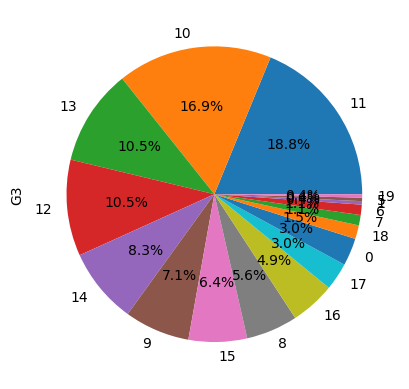

In [4]:
print(df.loc[df['sex']=="M"]['G3'].value_counts())
df.loc[df['sex']=="M"]['G3'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = F

11    54
13    54
10    52
12    44
14    41
15    32
16    23
17    21
8     20
9     16
18    11
7      7
0      7
19     1
Name: G3, dtype: int64


<AxesSubplot:ylabel='G3'>

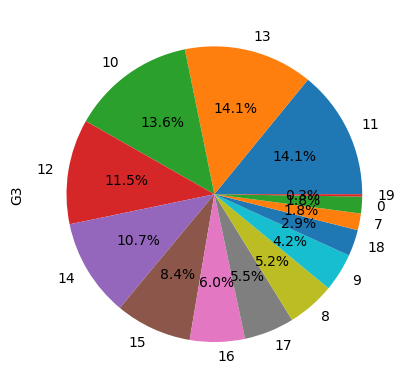

In [5]:
print(df.loc[df['sex']=="F"]['G3'].value_counts())
df.loc[df['sex']=="F"]['G3'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >=10

let y- = <10

let s0 = M

let s1 = F

In [6]:
# p(y+|s0) -> p(>=10|M)
p1 = len(df.loc[(df['sex']=="M") & (df['G3']>=10)]) / len(df.loc[df['sex']=="M"])
#print(p1)
# p(y-|s1) -> p(<10|F)
p2 = len(df.loc[(df['sex']=="F") & (df['G3']<10)]) / len(df.loc[df['sex']=="F"])
#print(p2)
# p(y+|s1) -> p(>=10|F)
p3 = len(df.loc[(df['sex']=="F") & (df['G3']>=10)]) / len(df.loc[df['sex']=="F"])
#print(p3)
# p(y-|s0) -> p(<10|M)
p4 = len(df.loc[(df['sex']=="M") & (df['G3']<10)]) / len(df.loc[df['sex']=="M"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.649


In [7]:
#OR for s0 = Female
oddsratio = (p3 * p4) / (p1 * p2)
print("OR: {:.3f}".format(oddsratio))

OR: 1.542


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >=10

let y- = <10

let s0 = M

let s1 = F

In [8]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.934


### Proxies

Most of the proxies found for sex include (a combination of):
 - 

Best model (min depth) found with a node at depth 2 with 6 samples.

	** Walc > 3.5 , studytime > 3.5 ,  #impurity: 0.0, #samples: 6.

Best model (max sample) found with 45 sample in a node at depth 7.

    ** famsup_no <= 0.5 , activities_no > 0.5 , reason_home <= 0.5 , Dalc <= 1.5 , Medu <= 2.5 , nursery_no <= 0.5 , schoolsup_yes <= 0.5 ,  #impurity: 0.0, #samples: 45.
    
    
Other:

    ** famsup_no > 0.5 , romantic_yes <= 0.5 , health > 1.5 , Dalc > 1.5 , Fjob_at_home <= 0.5 , studytime <= 1.5 , guardian_other <= 0.5 , G2 > 3.5 ,  #impurity: 0.0, #samples: 25.
        

For proxy: Walc > 3.5 & studytime > 3.5

M    6
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

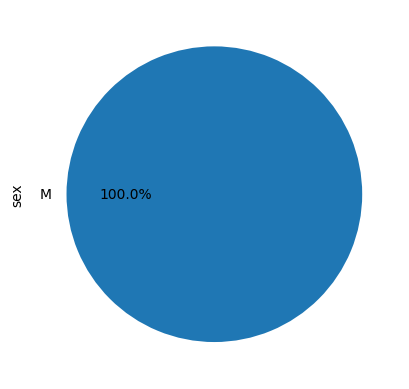

In [9]:
print(df.loc[(df['Walc']>3.5) & (df['studytime']>3.5)]['sex'].value_counts())
df.loc[(df['Walc']>3.5) & (df['studytime']>3.5)]['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

12    2
11    1
10    1
9     1
6     1
Name: G3, dtype: int64


<AxesSubplot:ylabel='G3'>

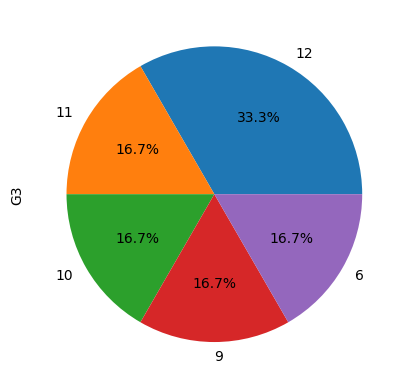

In [10]:
print(df.loc[(df['Walc']>3.5) & (df['studytime']>3.5)]['G3'].value_counts())
df.loc[(df['Walc']>3.5) & (df['studytime']>3.5)]['G3'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >=10

let y- = <10

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [11]:
# p(y+|s0) -> p(>=10|Proxy)
p1 = len(df.loc[(df['Walc']>3.5) & (df['studytime']>3.5) & (df['G3']>=10)]) / len(df.loc[(df['Walc']>3.5) & (df['studytime']>3.5)])
#print(p1)
# p(y-|s1) -> p(<10|!Proxy)
p2 = len(df.loc[((df['Walc']<=3.5) | (df['studytime']<=3.5)) & (df['G3']<10)]) / len(df.loc[((df['Walc']<=3.5) | (df['studytime']<=3.5))])
#print(p2)
# p(y+|s1) -> p(>=10|!Proxy)
p3 = len(df.loc[((df['Walc']<=3.5) | (df['studytime']<=3.5)) & (df['G3']>=10)]) / len(df.loc[((df['Walc']<=3.5) | (df['studytime']<=3.5))])
#print(p3)
# p(y-|s0) -> p(<10|Proxy)
p4 = len(df.loc[(df['Walc']>3.5) & (df['studytime']>3.5) & (df['G3']<10)]) / len(df.loc[(df['Walc']>3.5) & (df['studytime']>3.5)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.360


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >=10

let y- = <10

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [12]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.787


For proxy: famsup != no & activities == no & reason != home & Dalc <= 1.5 & Medu <= 2.5 & nursery != no &  schoolsup != yes

F    45
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

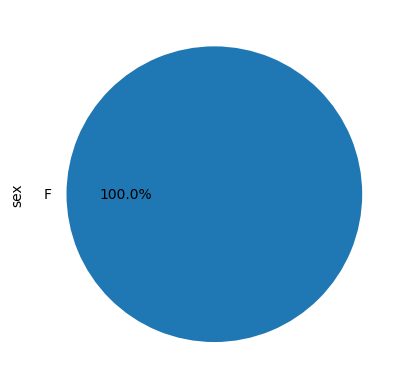

In [13]:
print(df.loc[(df['famsup']!="no") & (df['activities']=="no") & (df['reason']!="home") & (df['Medu']<=2.5) & (df['Dalc']<=1.5) & (df['nursery']!="no") & (df['schoolsup']!="yes")]['sex'].value_counts())
df.loc[(df['famsup']!="no") & (df['activities']=="no") & (df['reason']!="home") & (df['Medu']<=2.5) & (df['Dalc']<=1.5) & (df['nursery']!="no") & (df['schoolsup']!="yes")]['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

11    8
8     7
10    6
12    5
9     4
13    3
15    3
14    3
18    2
7     2
16    1
17    1
Name: G3, dtype: int64


<AxesSubplot:ylabel='G3'>

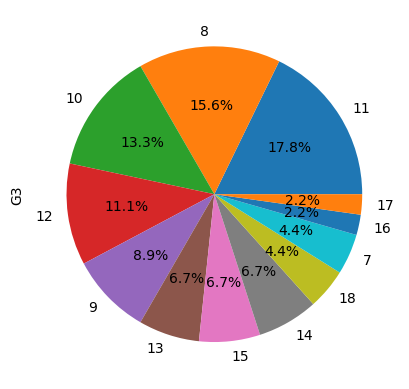

In [14]:
print(df.loc[(df['famsup']!="no") & (df['activities']=="no") & (df['reason']!="home") & (df['Medu']<=2.5) & (df['Dalc']<=1.5) & (df['nursery']!="no") & (df['schoolsup']!="yes")]['G3'].value_counts())
df.loc[(df['famsup']!="no") & (df['activities']=="no") & (df['reason']!="home") & (df['Medu']<=2.5) & (df['Dalc']<=1.5) & (df['nursery']!="no") & (df['schoolsup']!="yes")]['G3'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >=10

let y- = <10

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [15]:
# (df['famsup']!="no") & (df['activities']=="no") & (df['reason']!="home") & (df['Medu']<=2.5) & (df['Dalc']<=1.5) & (df['nursery']!="no") & (df['schoolsup']!="yes")
# p(y+|s0) -> p(>=10|Proxy)
p1 = len(df.loc[(df['famsup']!="no") & (df['activities']=="no") & (df['reason']!="home") & (df['Medu']<=2.5) & (df['Dalc']<=1.5) & (df['nursery']!="no") & (df['schoolsup']!="yes") & (df['G3']>=10)]) / len(df.loc[(df['famsup']!="no") & (df['activities']=="no") & (df['reason']!="home") & (df['Medu']<=2.5) & (df['Dalc']<=1.5) & (df['nursery']!="no") & (df['schoolsup']!="yes")])
#print(p1)
# p(y-|s1) -> p(<10|!Proxy)
p2 = len(df.loc[((df['famsup']=="no") | (df['activities']!="no") | (df['reason']=="home") | (df['Medu']>2.5) | (df['Dalc']>1.5) | (df['nursery']=="no") | (df['schoolsup']=="yes")) & (df['G3']<10)]) / len(df.loc[((df['famsup']=="no") | (df['activities']!="no") | (df['reason']=="home") | (df['Medu']>2.5) | (df['Dalc']>1.5) | (df['nursery']=="no") | (df['schoolsup']=="yes"))])
#print(p2)
# p(y+|s1) -> p(>=10|!Proxy)
p3 = len(df.loc[((df['famsup']=="no") | (df['activities']!="no") | (df['reason']=="home") | (df['Medu']>2.5) | (df['Dalc']>1.5) | (df['nursery']=="no") | (df['schoolsup']=="yes")) & (df['G3']>=10)]) / len(df.loc[((df['famsup']=="no") | (df['activities']!="no") | (df['reason']=="home") | (df['Medu']>2.5) | (df['Dalc']>1.5) | (df['nursery']=="no") | (df['schoolsup']=="yes"))])
#print(p3)
# p(y-|s0) -> p(<10|Proxy)
p4 = len(df.loc[(df['famsup']!="no") & (df['activities']=="no") & (df['reason']!="home") & (df['Medu']<=2.5) & (df['Dalc']<=1.5) & (df['nursery']!="no") & (df['schoolsup']!="yes") & (df['G3']<10)]) / len(df.loc[(df['famsup']!="no") & (df['activities']=="no") & (df['reason']!="home") & (df['Medu']<=2.5) & (df['Dalc']<=1.5) & (df['nursery']!="no") & (df['schoolsup']!="yes")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.414


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >=10

let y- = <10

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [16]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.831
